# How are trading volume and volatility related for energy stocks?

## Goals

In this lab, we will be replicating some of the analyses we conducted in the main lecture. You will gain more familiarity with the `pandas` library, which was introduced in the pre-foundational Python program, and will learn how to do basic feature engineering, how to plot distributions and how to calculate summary statistics.

## Importing the required libraries

Let's start by importing `pandas`:

In [8]:
# Import the Pandas package
import pandas as pd

We also import a second package, `matplotlib`, which is the basic Python library for plotting. We are interested only in the `pyplot` module, so we run this (here we use `plt` as the alias for the `pyplot` module that comes with the `matplotlib` package - `plt` as an alias is customary):

In [9]:
!pip install -r requirements.txt

     |████████████████████████████████| 10.3 MB 11 kB/s  eta 0:00:01    |█████▍                          | 1.7 MB 3.2 MB/s eta 0:00:03     |███████                         | 2.2 MB 3.2 MB/s eta 0:00:03     |███████████████████▏            | 6.2 MB 1.4 MB/s eta 0:00:04
     |████████████████████████████████| 3.0 MB 32.6 MB/s eta 0:00:01     |███▊                            | 348 kB 32.6 MB/s eta 0:00:01     |██████████▋                     | 983 kB 32.6 MB/s eta 0:00:01     |███████████████████▏            | 1.8 MB 32.6 MB/s eta 0:00:01
     |████████████████████████████████| 1.2 MB 42.4 MB/s eta 0:00:01


In [10]:
# Import the Matplotlib package (for plotting)
import matplotlib.pyplot as plt

Matplotlib is building the font cache; this may take a moment.


## Basic feature engineering

As you know, we can create new columns (also known as features) in our dataset using data from other columns. This is often useful when the existing features aren't in the right format or unit, or don't provide a lot of information by themselves.

Let's load in the CSV file for the stock symbol `D`:

In [3]:
# Load a file as a DataFrame and assign to the variable name D
D = pd.read_csv("data/D.csv")

In [11]:
D.head(10)

,Date,Open,High,Low,Close,Volume
0,2014-07-01,63.406,63.486,62.618,63.077,3626031
1,2014-07-02,62.929,62.935,61.403,61.730,4079097
2,2014-07-03,61.394,61.394,60.303,60.863,2937489
3,2014-07-07,60.718,61.430,60.611,61.038,3122145
4,2014-07-08,60.931,61.348,60.880,61.296,3048285
5,2014-07-09,61.385,61.501,60.897,61.340,1948182
6,2014-07-10,61.260,62.049,61.163,62.031,2471888
7,2014-07-11,61.871,62.031,61.535,61.607,1418862
8,2014-07-14,61.802,61.827,61.057,61.075,1810671
9,2014-07-15,61.028,61.696,60.994,61.625,2714819


As you see, our DataFrame has 6 columns (`Date`, `Open`, `High`, `Low`, `Close`, and `Volume`) and one default index (the vertical sequence of integers in bold to the left of the table).

It is usually a good idea to set one of the columns as the index, instead of using the default. We can do that with the **`.set_index()`** method:

In [12]:
D = D.set_index('Date') # In this context, Date is the best candidate to be the index
D.head(10)

,Open,High,Low,Close,Volume
Date,,,,,
2014-07-01,63.406,63.486,62.618,63.077,3626031
2014-07-02,62.929,62.935,61.403,61.730,4079097
2014-07-03,61.394,61.394,60.303,60.863,2937489
2014-07-07,60.718,61.430,60.611,61.038,3122145
2014-07-08,60.931,61.348,60.880,61.296,3048285
2014-07-09,61.385,61.501,60.897,61.340,1948182
2014-07-10,61.260,62.049,61.163,62.031,2471888
2014-07-11,61.871,62.031,61.535,61.607,1418862
2014-07-14,61.802,61.827,61.057,61.075,1810671


### Exercise 1

Load the other four datasets, namely `DUK.csv`, `EXC.csv`, `NEE.csv`, and `SO.csv`, and assign their contents to variables whose name is the symbol (that is, `DUK.csv` should be assigned to the variable `DUK`, and so on). Don't forget to set `Date` as the index for each one of the DataFrames.

**Answer.**

In [15]:
DUK = pd.read_csv("data/DUK.csv")
DUK = DUK.set_index("Date")
DUK.head(10)

,Open,High,Low,Close,Volume
Date,,,,,
2014-07-01,64.627,64.663,64.027,64.132,2294684
2014-07-02,64.017,64.062,62.599,62.904,5184383
2014-07-03,62.669,62.669,61.676,62.180,4014347
2014-07-07,62.059,62.460,61.955,62.346,3605032
2014-07-08,62.469,63.339,62.398,62.993,3653951
2014-07-09,62.993,63.165,62.450,62.808,2288750
2014-07-10,62.739,63.357,62.739,63.052,2298148
2014-07-11,63.147,63.312,62.808,62.852,2138967
2014-07-14,62.896,62.993,62.295,62.312,2707530


In [17]:
EXC = pd.read_csv("data/EXC.csv")
EXC = EXC.set_index("Date")
EXC.head(10)

,Open,High,Low,Close,Volume
Date,,,,,
2014-07-01,31.921,32.081,31.453,31.585,7947406
2014-07-02,31.453,31.488,30.372,30.606,12557024
2014-07-03,30.410,30.410,29.904,30.055,9060600
2014-07-07,30.136,30.533,30.107,30.402,11939160
2014-07-08,30.322,30.540,30.265,30.362,8170665
2014-07-09,30.410,30.499,30.214,30.312,8570182
2014-07-10,30.214,30.499,30.214,30.402,8450303
2014-07-11,30.257,30.410,29.834,29.886,10373878
2014-07-14,30.038,30.038,29.072,29.098,11574155


In [18]:
NEE = pd.read_csv("data/NEE.csv")
NEE = NEE.set_index("Date")
NEE.head(10)

,Open,High,Low,Close,Volume
Date,,,,,
2014-07-01,93.107,93.126,92.071,92.200,2755760
2014-07-02,91.915,92.190,90.368,90.612,3158624
2014-07-03,90.476,90.476,88.375,89.266,1601735
2014-07-07,89.130,89.967,89.130,89.504,2047271
2014-07-08,89.302,90.330,89.166,89.885,2477537
2014-07-09,89.766,90.222,89.350,89.821,1887920
2014-07-10,89.623,90.640,89.594,90.330,1683845
2014-07-11,90.300,90.539,89.703,89.949,1340583
2014-07-14,89.648,89.994,88.512,88.541,2012254


In [19]:
SO = pd.read_csv("data/SO.csv")
SO = SO.set_index("Date")
SO.head(10)

,Open,High,Low,Close,Volume
Date,,,,,
2014-07-01,39.030,39.030,38.677,38.781,4178434
2014-07-02,38.745,38.745,37.956,38.075,7517823
2014-07-03,37.912,37.912,37.568,37.859,4676611
2014-07-07,37.782,38.111,37.782,38.033,4807230
2014-07-08,38.066,38.531,38.066,38.316,5484594
2014-07-09,38.436,38.436,38.005,38.248,4324607
2014-07-10,38.265,38.635,38.188,38.402,6023792
2014-07-11,38.394,38.627,38.179,38.307,4671890
2014-07-14,38.298,38.420,37.981,38.005,4453486


-------

### The `symbol`  column

To create a new column in `pandas`, you use this syntax:

~~~python
my_dataframe["name_of_new_column"] = the_definition_of_the_new_column
~~~

So, to create a new column with the name of the symbol, you use:

In [20]:
D["Symbol"] = "D"
D.head(10)

,Open,High,Low,Close,Volume,Symbol
Date,,,,,,
2014-07-01,63.406,63.486,62.618,63.077,3626031,D
2014-07-02,62.929,62.935,61.403,61.730,4079097,D
2014-07-03,61.394,61.394,60.303,60.863,2937489,D
2014-07-07,60.718,61.430,60.611,61.038,3122145,D
2014-07-08,60.931,61.348,60.880,61.296,3048285,D
2014-07-09,61.385,61.501,60.897,61.340,1948182,D
2014-07-10,61.260,62.049,61.163,62.031,2471888,D
2014-07-11,61.871,62.031,61.535,61.607,1418862,D
2014-07-14,61.802,61.827,61.057,61.075,1810671,D


Here we defined a new column called `Symbol` and asked `pandas` to assign the string value `D` to *all* of its rows. Let's create the corresponding `Symbol` column in `DUK`, `EXC`, `NEE` and `SO`.

In [21]:
DUK["Symbol"] = "DUK"
EXC["Symbol"] = "EXC"
NEE["Symbol"] = "NEE"
SO["Symbol"] = "SO"

#### Concatenating our DataFrame

Below we stitch all the dataframes together with the `pd.concat()` function (we will need this concatenated DataFrame in a moment):

In [22]:
stocks = pd.concat([D, DUK, EXC, NEE, SO])

In [23]:
stocks.head()

,Open,High,Low,Close,Volume,Symbol
Date,,,,,,
2014-07-01,63.406,63.486,62.618,63.077,3626031,D
2014-07-02,62.929,62.935,61.403,61.730,4079097,D
2014-07-03,61.394,61.394,60.303,60.863,2937489,D
2014-07-07,60.718,61.430,60.611,61.038,3122145,D
2014-07-08,60.931,61.348,60.880,61.296,3048285,D


In [24]:
stocks['Symbol'].unique()

array(['D', 'DUK', 'EXC', 'NEE', 'SO'], dtype=object)

### The `Return` column

This is the daily return formula:

$$
Return = \frac{Close_t}{Close_{t-1}} - 1
$$

Let's look at our DataFrame `D` (we only show  the first three rows):

In [25]:
D.head(3)

,Open,High,Low,Close,Volume,Symbol
Date,,,,,,
2014-07-01,63.406,63.486,62.618,63.077,3626031,D
2014-07-02,62.929,62.935,61.403,61.730,4079097,D
2014-07-03,61.394,61.394,60.303,60.863,2937489,D


Let's compute $Return$ for July 3:

In [26]:
close_2_july = 61.730
close_3_july = 60.863
return_3_july = (close_3_july / close_2_july) - 1
print(return_3_july)

-0.01404503482909436


We could write a `for` loop to do this operation on each of the rows one by one, but thankfully `pandas` offers us an easier way - the **`.shift()`** method. The `.shift()` method takes a Series and shifts it up or down (depending on your input) in relation to the index of the Series. This is better understood with an example - here's the head of the `High` Series:

In [27]:
D["High"].head(5)

Date
2014-07-01    63.486
2014-07-02    62.935
2014-07-03    61.394
2014-07-07    61.430
2014-07-08    61.348
Name: High, dtype: float64

You can see that the `High` price for July 3 was 61.394.

You can shift the Series so that the value that is associated with July 3 is no longer its own, but rather the one corresponding to July 7:

In [28]:
D["High"].head(5).shift(-1)

Date
2014-07-01    62.935
2014-07-02    61.394
2014-07-03    61.430
2014-07-07    61.348
2014-07-08       NaN
Name: High, dtype: float64

You can, of course, reverse the direction of the shift and move the whole Series "downwards" instead:

In [29]:
D["High"].head(5).shift(1)

Date
2014-07-01       NaN
2014-07-02    63.486
2014-07-03    62.935
2014-07-07    61.394
2014-07-08    61.430
Name: High, dtype: float64

And you can shift it as many rows as you want:

In [30]:
D["High"].head(5).shift(3)

Date
2014-07-01       NaN
2014-07-02       NaN
2014-07-03       NaN
2014-07-07    63.486
2014-07-08    62.935
Name: High, dtype: float64

### Exercise 2


This is the formula we want to code:

$$
Return = \frac{Close_t}{Close_{t-1}} - 1
$$

Getting $Close_t$ is easy:

~~~python
D["Close"]
~~~

But how would you get its shifted version, $Close_{t-1}$?

**Hint:** Let's say $t=30$. You would then want to get $Close_{29}$. So, in your table, the row for $t=30$ should have a column that contains $Close_{30}$ (this one already exists, it's in `Close`) and another one (call it `Close_Previous`) that contains $Close_{29}$.

**Answer.**

In [34]:
stocks["Close_Previous"] = stocks["Close"].shift(1)
stocks.head()

,Open,High,Low,Close,Volume,Symbol,Close_Previous
Date,,,,,,,
2014-07-01,63.406,63.486,62.618,63.077,3626031,D,NaN
2014-07-02,62.929,62.935,61.403,61.730,4079097,D,63.077
2014-07-03,61.394,61.394,60.303,60.863,2937489,D,61.730
2014-07-07,60.718,61.430,60.611,61.038,3122145,D,60.863
2014-07-08,60.931,61.348,60.880,61.296,3048285,D,61.038


-------

### Exercise 3

How would you code the definition of `Return`?

**Answer.**

In [38]:
stocks["Return"] = stocks["Close"]/stocks["Close_Previous"]-1.0
stocks.head()

,Open,High,Low,Close,Volume,Symbol,Close_Previous,Return
Date,,,,,,,,
2014-07-01,63.406,63.486,62.618,63.077,3626031,D,NaN,NaN
2014-07-02,62.929,62.935,61.403,61.730,4079097,D,63.077,-0.021355
2014-07-03,61.394,61.394,60.303,60.863,2937489,D,61.730,-0.014045
2014-07-07,60.718,61.430,60.611,61.038,3122145,D,60.863,0.002875
2014-07-08,60.931,61.348,60.880,61.296,3048285,D,61.038,0.004227


-------

### Trading volume in millions

Recall the formula:

$$
Volume\_Millions = \frac{Volume}{1,000,000}
$$

You probably remember that you can divide in Python using the `/` symbol. Since `pandas` Series support Python arithmetic, you can simply do this in order to create the new column (notice that we now use the concatenated DataFrame `stocks` instead of the `D` DataFrame):

In [39]:
stocks["Volume_Millions"] = stocks["Volume"] / 1000000
stocks.head(10)

,Open,High,Low,Close,Volume,Symbol,Close_Previous,Return,Volume_Millions
Date,,,,,,,,,
2014-07-01,63.406,63.486,62.618,63.077,3626031,D,NaN,NaN,3.626031
2014-07-02,62.929,62.935,61.403,61.730,4079097,D,63.077,-0.021355,4.079097
2014-07-03,61.394,61.394,60.303,60.863,2937489,D,61.730,-0.014045,2.937489
2014-07-07,60.718,61.430,60.611,61.038,3122145,D,60.863,0.002875,3.122145
2014-07-08,60.931,61.348,60.880,61.296,3048285,D,61.038,0.004227,3.048285
2014-07-09,61.385,61.501,60.897,61.340,1948182,D,61.296,0.000718,1.948182
2014-07-10,61.260,62.049,61.163,62.031,2471888,D,61.340,0.011265,2.471888
2014-07-11,61.871,62.031,61.535,61.607,1418862,D,62.031,-0.006835,1.418862
2014-07-14,61.802,61.827,61.057,61.075,1810671,D,61.607,-0.008635,1.810671


### A measure of volatility

This is another formula that we need to replicate in our concatenated DataFrame:

$$
VolStat = \frac{High_t - Low_t}{Open_t}
$$

Let's add it to our dataset:

In [41]:
stocks["VolStat"] = (stocks["High"] - stocks["Low"]) / stocks["Open"]
stocks.head()

,Open,High,Low,Close,Volume,Symbol,Close_Previous,Return,Volume_Millions,VolStat
Date,,,,,,,,,,
2014-07-01,63.406,63.486,62.618,63.077,3626031,D,NaN,NaN,3.626031,0.013690
2014-07-02,62.929,62.935,61.403,61.730,4079097,D,63.077,-0.021355,4.079097,0.024345
2014-07-03,61.394,61.394,60.303,60.863,2937489,D,61.730,-0.014045,2.937489,0.017770
2014-07-07,60.718,61.430,60.611,61.038,3122145,D,60.863,0.002875,3.122145,0.013489
2014-07-08,60.931,61.348,60.880,61.296,3048285,D,61.038,0.004227,3.048285,0.007681


## Creating histograms

This is a histogram of the `Volume_Millions` column in `stocks` (therefore it includes the data for all five symbols). Here we use the `.plot.hist()` method and accept the default bins that Pandas calculates.

[]

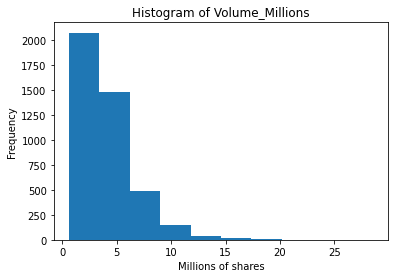

In [42]:
hvm = stocks['Volume_Millions'].plot.hist()

hvm.set_title("Histogram of Volume_Millions")
hvm.set_xlabel("Millions of shares")

plt.plot()

### Exercise 4

Plot the histogram of the `Open` column in `stocks`.

**Answer.**

[]

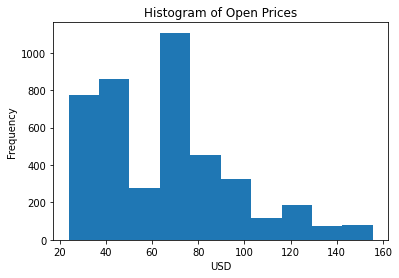

In [48]:
ho = stocks['Open'].plot.hist()

ho.set_title("Histogram of Open Prices")
ho.set_xlabel("USD")

plt.plot()

-------

## Summary statistics

### Minimum, maximum, mean and median

To find the minimum, maximum, mean, median, and mode of a distribution, we can use these functions:

~~~python
.min()
.max()
.mean()
.median()
.mode()
~~~

For instance:

In [47]:
stocks["Close"].min()

23.84

### Percentiles

To compute the $p$-th percentile, you use

~~~python
my_series.quantile(per/100)
~~~

The resulting number will be such that $p$% of your data points are smaller than that value. So, for instance, if you want to find the $p=30$ percentile (a value such that 30% of your data points are smaller than that value), you need to pass 0.3 to the function, like this:

~~~python
my_series.quantile(0.3)
~~~

For instance:

In [49]:
per0 = stocks["Close"].quantile(0)
per25 = stocks["Close"].quantile(0.25)
per50 = stocks["Close"].quantile(0.50)
per75 = stocks["Close"].quantile(0.75)
per100 = stocks["Close"].quantile(1)

print(per0)
print(per25)
print(per50)
print(per75)
print(per100)

23.84
40.63975
65.48400000000001
80.262
155.84


## Using `.groupby()`

We can easily calculate the summary statistics for any given column with the **`.describe()`** method:

In [50]:
stocks["Volume_Millions"].describe()

count    4250.000000
mean        4.101373
std         2.549883
min         0.581504
25%         2.297885
50%         3.436098
75%         5.178914
max        28.570392
Name: Volume_Millions, dtype: float64

However, it would be more useful if we computed the summary statistics *for each symbol individually.* Let's group our `stocks` DataFrame by `Symbol`. The resulting `DataFrameGroupBy` object should have five elements, because there are five symbols:

In [51]:
g = stocks.groupby(['Symbol'])
len(g)

5

So, this is basically the `VolStat` column split up into five chunks, one for each stock symbol.

The real power of `.groupby()` is evident when you pair it with **aggregation functions** like `sum()`, `mean()` and others. For instance:

In [52]:
stocks.groupby(['Symbol'])["VolStat"].median()

Symbol
D      0.013084
DUK    0.012351
EXC    0.016744
NEE    0.013178
SO     0.012017
Name: VolStat, dtype: float64

### Exercise 5

Copy the preceding code and modify it to run the `.describe()` function on the grouped `VolStat` column.

**Answer.**

In [54]:
stocks.groupby(['Symbol'])["VolStat"].describe()

,count,mean,std,min,25%,50%,75%,max
Symbol,,,,,,,,
D,850.0,0.014364,0.006420,0.003636,0.009789,0.013084,0.017269,0.049232
DUK,850.0,0.014070,0.006368,0.003548,0.009649,0.012351,0.017350,0.054170
EXC,850.0,0.018529,0.008725,0.005390,0.012319,0.016744,0.022779,0.093240
NEE,850.0,0.014801,0.006672,0.004454,0.010192,0.013178,0.017617,0.056885
SO,850.0,0.013325,0.005952,0.002926,0.009068,0.012017,0.015934,0.047707


-------

This is the output we wanted. We have the summary statistics of the `VolStat` column *for each symbol*.

## Plotting the time series

Let's now plot the `VolStat` time series. Since we have several stocks, we can use one series for each stock.

This bit that follows is important because you'll see it a lot in professional practice. Let's first find out what data type our index is:

In [55]:
stocks.index

Index(['2014-07-01', '2014-07-02', '2014-07-03', '2014-07-07', '2014-07-08',
       '2014-07-09', '2014-07-10', '2014-07-11', '2014-07-14', '2014-07-15',
       ...
       '2017-10-30', '2017-10-31', '2017-11-01', '2017-11-02', '2017-11-03',
       '2017-11-06', '2017-11-07', '2017-11-08', '2017-11-09', '2017-11-10'],
      dtype='object', name='Date', length=4250)

So you can see that this index is of `dtype='object'`, which means that for `pandas` its elements are not dates, but rather simple strings. If we were to plot our variables using this index as the time axis, we could get a lot of unexpected and weird behaviors. That's why it is always advised to cast our columns into the appropriate data types before plotting or doing analyses with them.

Let's convert this index to the `datetime` data type:

In [56]:
stocks.index = pd.to_datetime(stocks.index)
stocks.index

DatetimeIndex(['2014-07-01', '2014-07-02', '2014-07-03', '2014-07-07',
               '2014-07-08', '2014-07-09', '2014-07-10', '2014-07-11',
               '2014-07-14', '2014-07-15',
               ...
               '2017-10-30', '2017-10-31', '2017-11-01', '2017-11-02',
               '2017-11-03', '2017-11-06', '2017-11-07', '2017-11-08',
               '2017-11-09', '2017-11-10'],
              dtype='datetime64[ns]', name='Date', length=4250, freq=None)

Now you see that our new data type is `datetime64[ns]`, which is what we wanted. For more details about the `datetime` data type, check the [docs](https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html).

The actual plot is very easy to make. You just take the `SeriesGroupBy` object that corresponds to `VolStat` and call the `.plot()` method on it:

Symbol
D      AxesSubplot(0.125,0.2;0.775x0.68)
DUK    AxesSubplot(0.125,0.2;0.775x0.68)
EXC    AxesSubplot(0.125,0.2;0.775x0.68)
NEE    AxesSubplot(0.125,0.2;0.775x0.68)
SO     AxesSubplot(0.125,0.2;0.775x0.68)
Name: VolStat, dtype: object

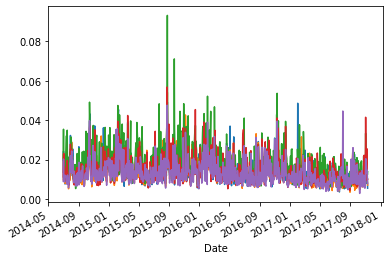

In [57]:
stocks.groupby("Symbol")["VolStat"].plot()

This plots one series for each symbol. The output is accurate, but the plot looks somewhat raw at the moment. Let's add the all-important legend and a title:

Symbol
D      AxesSubplot(0.125,0.2;0.775x0.68)
DUK    AxesSubplot(0.125,0.2;0.775x0.68)
EXC    AxesSubplot(0.125,0.2;0.775x0.68)
NEE    AxesSubplot(0.125,0.2;0.775x0.68)
SO     AxesSubplot(0.125,0.2;0.775x0.68)
Name: VolStat, dtype: object

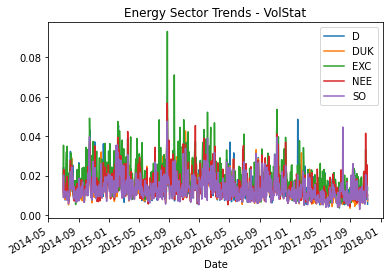

In [58]:
stocks.groupby("Symbol")["VolStat"].plot(legend=True, title="Energy Sector Trends - VolStat")

And let's make it a bit bigger with the `figsize` argument:

Symbol
D      AxesSubplot(0.125,0.2;0.775x0.68)
DUK    AxesSubplot(0.125,0.2;0.775x0.68)
EXC    AxesSubplot(0.125,0.2;0.775x0.68)
NEE    AxesSubplot(0.125,0.2;0.775x0.68)
SO     AxesSubplot(0.125,0.2;0.775x0.68)
Name: VolStat, dtype: object

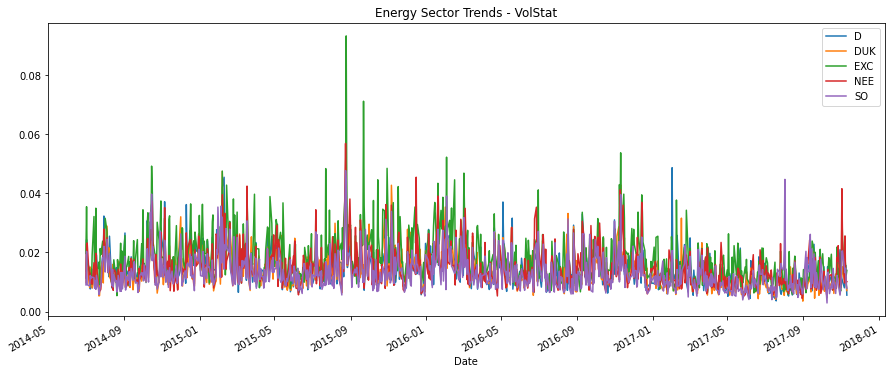

In [59]:
stocks.groupby("Symbol")["VolStat"].plot(legend=True,
                                         title="Energy Sector Trends - VolStat",
                                         figsize=(15,6)
                                        )

## Attribution

"Reshaping and pivot" (modified from the original), Pandas Developers, [BSD-3 license](https://github.com/pandas-dev/pandas/blob/master/LICENSE), https://pandas.pydata.org/pandas-docs/stable/user_guide/reshaping.html.


"Huge Stock Market Dataset", No. 10, 2017, Boris Marjanovic, Public Domain. https://www.kaggle.com/borismarjanovic/price-volume-data-for-all-us-stocks-etfs